In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Load dataset
df = pd.read_csv('/content/cancer QOL.csv')

In [136]:
print(df.columns)


Index(['SI No', 'Age ', 'Age_cat', 'Height', 'Weight ', 'BMI', 'BMI type',
       'household mem', 'mem_cat', 'Occupation', 'Sex', 'Religion',
       'Education', 'Marital', 'smoking', 'income ', 'income_cat',
       'localization', 'stage', 'metastasis', 'illness duration',
       'Follow dietrician', 'treatment duration', 'duration_cat',
       'Chemotheraphy', 'Surgical treatment', 'Palliative', 'PS',
       'Performance status', 'hospital stay ', 'hospital_cat', 'QOL1', 'QOL2',
       'QOL3', 'QOL4', 'QOL5', 'QOL6', 'QOL7', 'QOL8', 'QOL9', 'QOL10',
       'QOL11', 'QOL12', 'QOL13', 'QOL14', 'QOL15', 'QOL16', 'QOL17', 'QOL18',
       'QOL19', 'QOL20', 'QOL21', 'QOL22', 'QOL23', 'QOL24', 'QOL25', 'QOL26',
       'QOL27', 'QOL28', 'QOL29', 'QOL30', 'QOL31', 'QOL32', 'QOL33', 'QOL34',
       'QOL35', 'QOL36', 'QOL37', 'QOL38', 'QOL39', 'QOL40', 'QOL41', 'QOL ',
       'QOL', 'QOL_cat', 'Nutrition ', 'Nutrition_cat', 'Cancer'],
      dtype='object')


In [26]:

# Print the first 5 rows of the dataframe
print(df.head())

   SI No  Age  Age_cat  Height  Weight        BMI    BMI type  household mem  \
0    1.0   25  less 40     165      85  31.221304  overweight            6.0   
1    2.0   70  over 60     150      59  26.222222  overweight            4.0   
2    3.0   36  less 40     158      68  27.239224  overweight            6.0   
3    4.0   32  less 40     162      52  19.814053      normal            8.0   
4    5.0   50    40-60     158      57  22.832879      normal            5.0   

   mem_cat Occupation  ... QOL38 QOL39 QOL40 QOL41    QOL      QOL QOL_cat  \
0  up to 6          c  ...   3.0   3.0   7.0   8.0  141.0  average    good   
1  up to 6          b  ...   3.0   3.0   7.0   6.0  103.0      low    poor   
2  up to 6          c  ...   4.0   4.0   9.0   9.0  155.0     high    good   
3   more 6          c  ...   4.0   3.0   6.0   7.0  133.0  average    good   
4  up to 6          a  ...   4.0   3.0   9.0   8.0  132.0  average    good   

        Nutrition   Nutrition_cat Cancer  
0      

In [14]:
df.columns = [col.strip() for col in df.columns]  # remove spaces
selected_cols = ['Age', 'Height', 'Weight', 'BMI', 'Sex', 'Education', 'smoking', 'localization', 'stage', 'metastasis', 'illness duration', 'treatment duration', 'Chemotheraphy', 'Surgical treatment', 'Palliative', 'Cancer']
df_selected = df[selected_cols]


In [15]:
# Data Preprocessing
# Remove missing values
df_clean = df_selected.dropna()


<ipython-input-16-5208f7fbad9e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_clean.corr()


<Axes: >

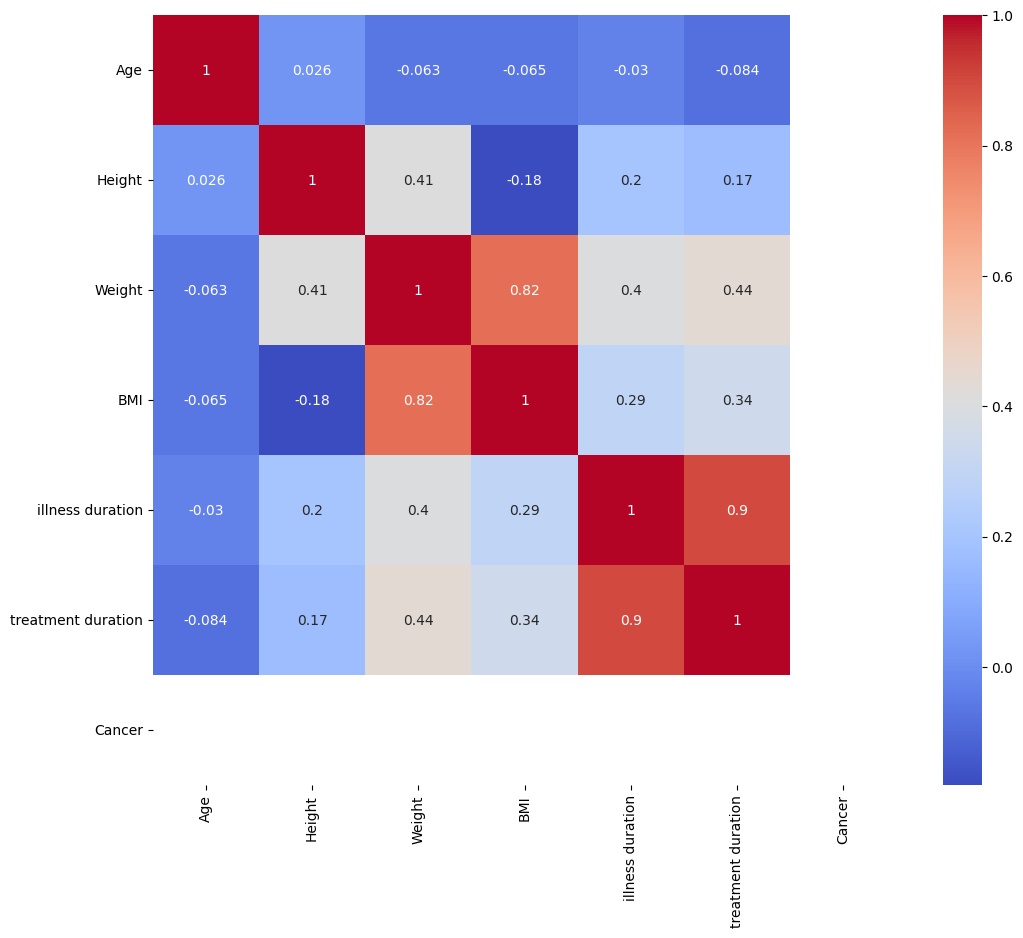

In [16]:
# Data Visualization
# Correlation matrix
corr_matrix = df_clean.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')




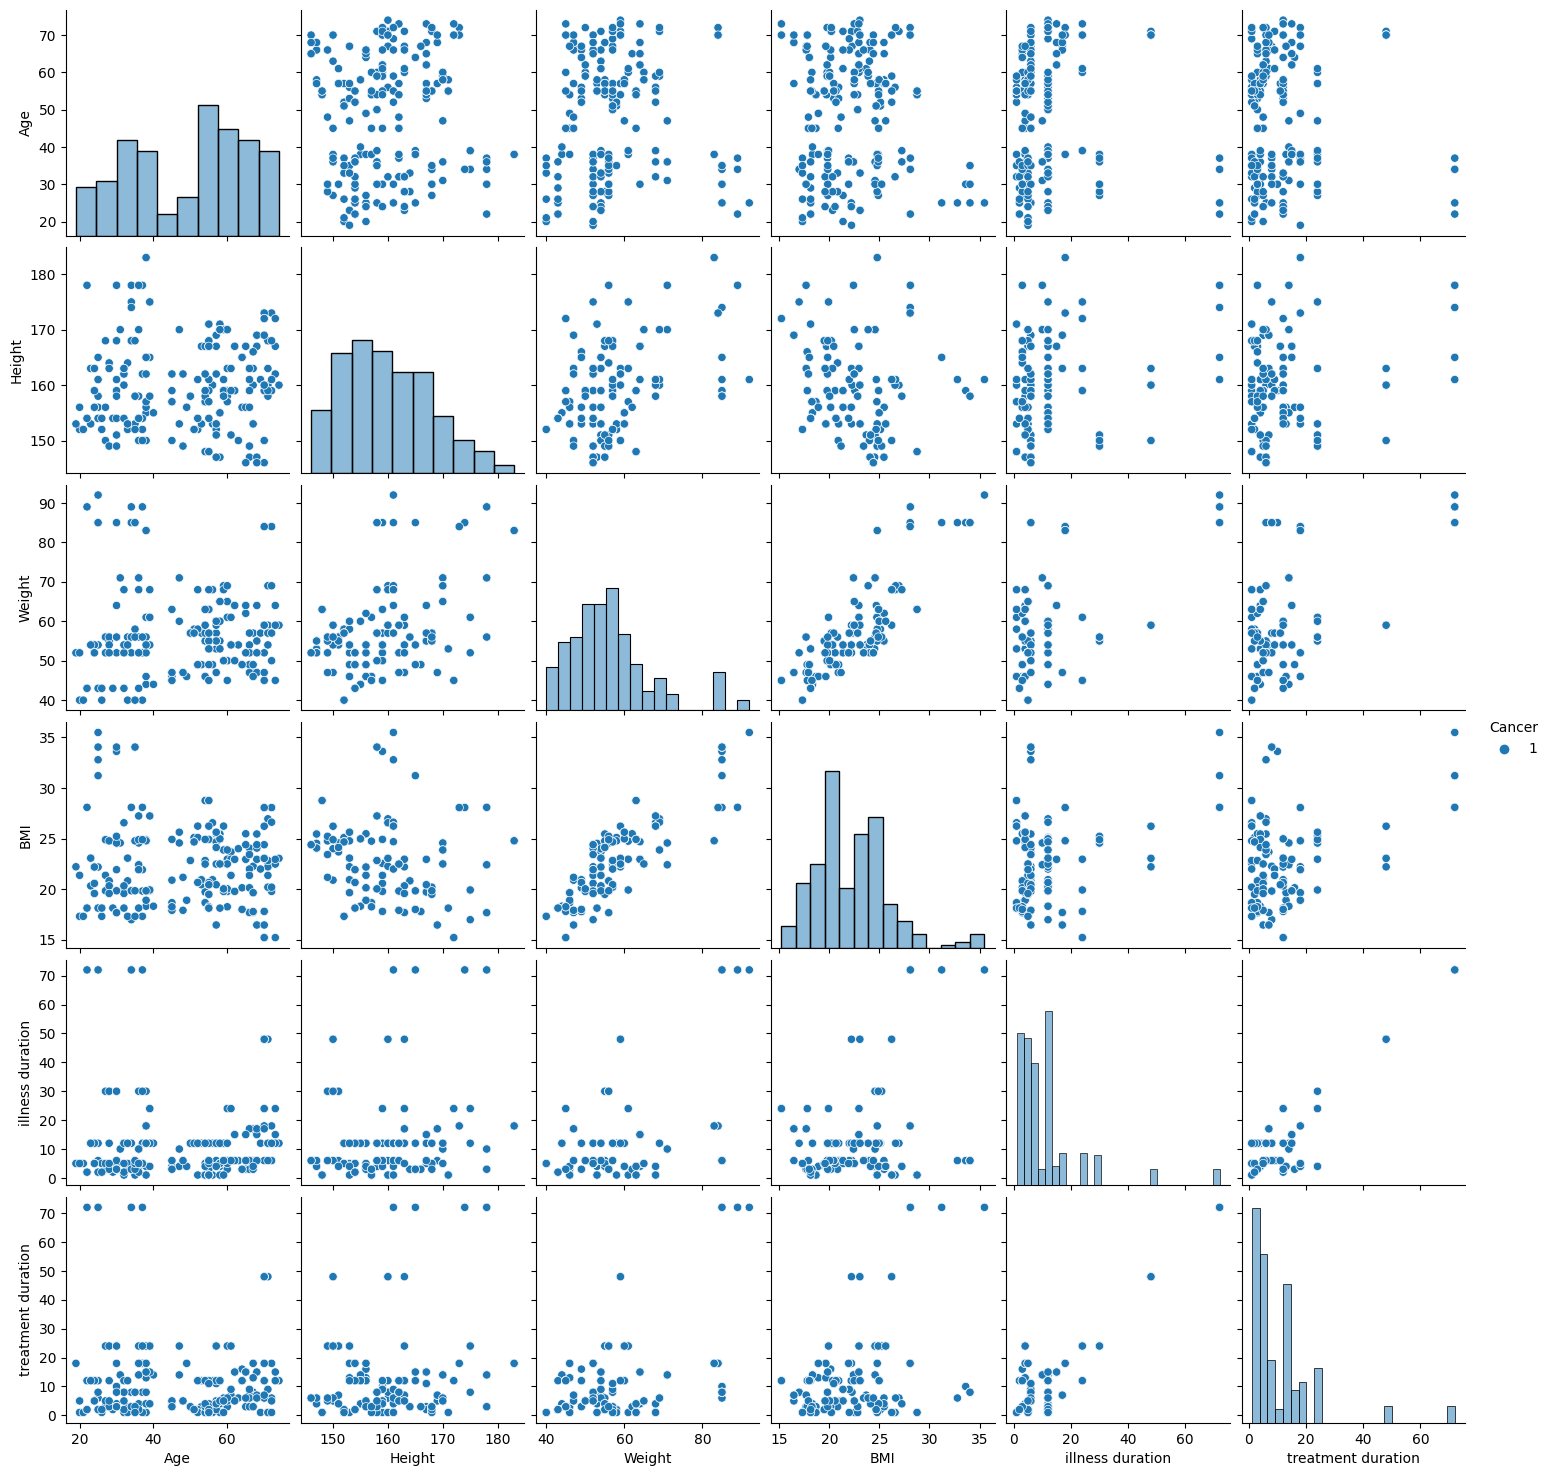

In [17]:
sns.pairplot(df_clean, hue='Cancer', diag_kind='hist')


<ipython-input-19-6d57e2079faa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['Age'])


<Axes: xlabel='Age', ylabel='Density'>

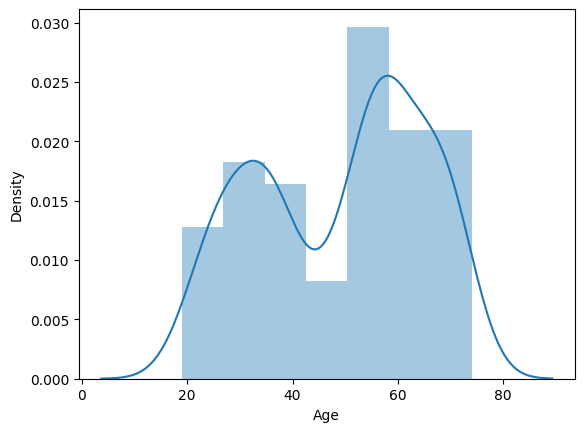

In [19]:
sns.distplot(df_clean['Age'])


<Axes: xlabel='Cancer', ylabel='Age'>

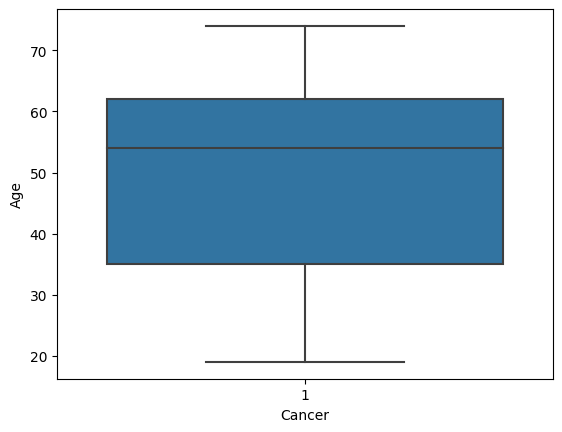

In [18]:
sns.boxplot(x='Cancer', y='Age', data=df_clean)


<Axes: xlabel='Cancer', ylabel='Age'>

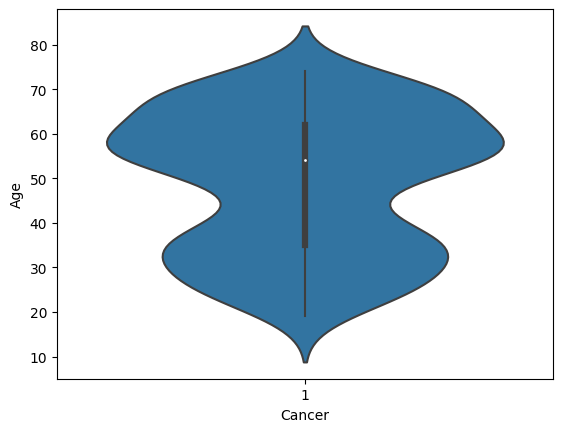

In [20]:
sns.violinplot(x='Cancer', y='Age', data=df_clean)

In [25]:
df_clean.columns


Index(['Age', 'Height', 'Weight', 'BMI', 'Sex', 'Education', 'smoking',
       'localization', 'stage', 'metastasis', 'illness duration',
       'treatment duration', 'Chemotheraphy', 'Surgical treatment',
       'Palliative', 'Cancer'],
      dtype='object')

In [22]:
# Convert categorical variables to numerical using one-hot encoding
df_transformed = pd.get_dummies(df_clean, columns=['Sex', 'Education', 'smoking', 'localization', 'stage', 'metastasis', 'Chemotheraphy', 'Surgical treatment', 'Palliative', 'Cancer'])

In [23]:
# Data Modeling
# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_clean.drop('Cancer',axis=1), df_clean['Cancer'], test_size=0.3, random_state=101)


In [24]:
# Data Transformation
# Convert categorical variables to numerical using one-hot encoding
cols_to_transform = ['Sex', 'Education', 'Smoking', 'Localization', 'Stage', 'Metastasis', 'Chemotherapy', 'Surgical Treatment', 'Palliative', 'Cancer']
cols_to_transform = [col for col in cols_to_transform if col in df_clean.columns]
df_transformed = pd.get_dummies(df_clean, columns=cols_to_transform)

# Check data types to ensure all columns are numerical
print(df_transformed.dtypes)


Age                     int64
Height                  int64
Weight                  int64
BMI                   float64
smoking                object
localization           object
stage                  object
metastasis             object
illness duration        int64
treatment duration      int64
Chemotheraphy          object
Surgical treatment     object
Sex_a                   uint8
Sex_b                   uint8
Education_a             uint8
Education_b             uint8
Education_c             uint8
Education_d             uint8
Palliative_no           uint8
Palliative_yes          uint8
Cancer_1                uint8
dtype: object


In [21]:
# Data Transformation
# Convert categorical variables to numerical using one-hot encoding
df_transformed = pd.get_dummies(df_clean, columns=['Sex', 'Education', 'smoking', 'localization', 'stage', 'metastasis', 'Chemotheraphy', 'Surgical treatment', 'Palliative', 'Cancer'])

# Check data types to ensure all columns are numerical
print(df_transformed.dtypes)


Age                         int64
Height                      int64
Weight                      int64
BMI                       float64
illness duration            int64
treatment duration          int64
Sex_a                       uint8
Sex_b                       uint8
Education_a                 uint8
Education_b                 uint8
Education_c                 uint8
Education_d                 uint8
smoking_a                   uint8
smoking_b                   uint8
localization_breast         uint8
localization_lgt            uint8
localization_lung           uint8
localization_others         uint8
localization_rs             uint8
localization_ugt            uint8
stage_a                     uint8
stage_b                     uint8
stage_c                     uint8
stage_d                     uint8
stage_e                     uint8
metastasis_a                uint8
metastasis_b                uint8
Chemotheraphy_no            uint8
Chemotheraphy_yes           uint8
Surgical treat

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_transformed.drop(['Cancer_1'], axis=1), df_transformed['Cancer_1'], test_size=0.2, random_state=42)

# Fit the Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb.predict(X_test)


In [145]:
# Evaluate performance of model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        56

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56



In [146]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_transformed.drop('Cancer_1', axis=1), df_transformed['Cancer_1'], test_size=0.2, random_state=42)

# Train a Gaussian Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb.predict(X_test)

# Evaluate the model on the test set
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        56

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56



In [147]:
# Generate demo data with modified column names to match those used to train the model
demo_data = {
    'Age': 60,
    'Height': 170,
    'Weight': 80,
    'BMI': 27.7,
    'Sex_Female': 0,  # note the modified column name
    'Sex_Male': 1,  # note the modified column name
    'Education_Bachelor': 1,  # note the modified column name
    'Education_Doctorate': 0,  # note the modified column name
    'Education_HS-grad': 0,  # note the modified column name
    'Education_Master': 0,  # note the modified column name
    'smoking_Current smoker': 0,  # note the modified column name
    'smoking_Former smoker': 1,  # note the modified column name
    'smoking_Never smoked': 0,  # note the modified column name
    'localization_Breast': 1,  # note the modified column name
    'localization_Colorectal': 0,  # note the modified column name
    'localization_Lung': 0,  # note the modified column name
    'stage_Stage I': 0,  # note the modified column name
    'stage_Stage II': 0,  # note the modified column name
    'stage_Stage III': 1,  # note the modified column name
    'stage_Stage IV': 0,  # note the modified column name
    'metastasis_No': 1,  # note the modified column name
    'metastasis_Yes': 0,  # note the modified column name
    'illness duration': 24,
    'treatment duration': 6,
    'Chemotherapy_No': 1,  # note the modified column name
    'Chemotherapy_Yes': 0,  # note the modified column name
    'Surgical treatment_No': 0,  # note the modified column name
    'Surgical treatment_Yes': 1,  # note the modified column name
    'Palliative_No': 1,  # note the modified column name
    'Palliative_Yes': 0  # note the modified column name
}

# Create a dataframe from the demo data
demo_df = pd.DataFrame(demo_data, index=[0])


In [148]:
# Convert categorical variables to numerical using one-hot encoding
cols_to_transform = ['Sex', 'Education', 'Smoking', 'Localization', 'Stage', 'Metastasis', 'Chemotherapy', 'Surgical Treatment', 'Palliative', 'Cancer']
cols_to_transform = [col for col in cols_to_transform if col in demo_df.columns]
demo_df_transformed = pd.get_dummies(demo_df, columns=cols_to_transform)

# Add missing columns to demo_df_transformed
missing_cols = set(df_transformed.columns) - set(demo_df_transformed.columns)
for col in missing_cols:
    demo_df_transformed[col] = 0

# Reorder columns to match the training dataset
demo_df_transformed = demo_df_transformed[df_transformed.drop('Cancer_1', axis=1).columns]

# Make prediction using the trained model
prediction = nb.predict(demo_df_transformed)

# Print the prediction
if prediction[0] == 1:
    print("The model predicts that the person has cancer based on the given symptoms.")
else:
    print("The model predicts that the person does not have cancer based on the given symptoms.")



The model predicts that the person has cancer based on the given symptoms.
